In [ ]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="onDyXnEMfvwwYC17tKr4")
project = rf.workspace("yus-space").project("construction-site-safety-helmet")
version = project.version(1)
dataset = version.download("yolov8")


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ----- ---------------------------------- 5.0/38.8 MB 25.1 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/38.8 MB 26.1 MB/s eta 0:00:02
   ------------ --------------------------- 12.3/38.8 MB 19.8 MB/s eta 0:00:02
   -------------- ------------------------- 14.2/38.8 MB 17.1 MB/s eta 0:00:02
   ---------------- ----------------------- 16.0/38.8 MB 15.3 MB/s eta 0:00:02
   ------------------- -------------------- 18.6/38.8 MB 14.5 MB/s eta 0:00:02
   ---------------------- ----------------- 22.0/38.8 MB 14.8 MB/s eta 0:00:02
   -------------------------- ------------- 25.4/38.8 MB 14.9 MB/s eta 0:00:01
   ---------------------------- ----------- 27.3/38.8 MB 14.3 MB/s eta 0:00:01
   ------------------------------- -------- 30.4/38.8 MB 14.3 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.8 MB 14.5 MB/s eta 0:00:01
   ------------------------------------- -- 35.9/38.8 MB 14.2 


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-site-safety-helmet-1 in yolov8:: 100%|██████████| 36594/36594 [00:50<00:00, 724.03it/s] 


In [3]:
original_structure = ["train/images/img1.jpg", "train/labels/img1.txt",
                      "valid/images/img2.jpg", 'valid/labels/img2.txt',
                      "test/images/img3.jpg", "test/labels/img3.txt"]

print("Original Structur")
for f in original_structure:
  print(f" - {f}")

restructure_structure = ["images/train/img1.jpg", "labels/train/img1.txt",
                      "images/val/img2.jpg", 'labels/val/img2.txt',
                      "images/test/img3.jpg", "labels/test/img3.txt"]

print("Restructure Structur")
for f in restructure_structure:
  print(f" - {f}")


Original Structur
 - train/images/img1.jpg
 - train/labels/img1.txt
 - valid/images/img2.jpg
 - valid/labels/img2.txt
 - test/images/img3.jpg
 - test/labels/img3.txt
Restructure Structur
 - images/train/img1.jpg
 - labels/train/img1.txt
 - images/val/img2.jpg
 - labels/val/img2.txt
 - images/test/img3.jpg
 - labels/test/img3.txt


#Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# #path to your yolo flat datset
# DRIVE_DST_ROOT = "/content/drive/MyDrive/dataset"

# #check folder structure
# !ls {DRIVE_DST_ROOT}/images
# !ls {DRIVE_DST_ROOT}/labels
# !ls {DRIVE_DST_ROOT}/data.yaml

In [4]:
import os
path = '/content/dataset'
for split in ['train/images', 'valid/images', 'test/images']:
  n = len(os.listdir(os.path.join(path,   split)))
  print(f'{split}: {n} images')

train/images: 16884 images
valid/images: 704 images
test/images: 703 images


Corresponding YOLO label file : 003621_jpg.rf.d7a318a46307dde58e45740a13d3b730.txt
1 0.3328125 0.3671875 0.08125 0.140625
1 0.5578125 0.4390625 0.0890625 0.1484375
1 0.43203125 0.4453125 0.0609375 0.1125


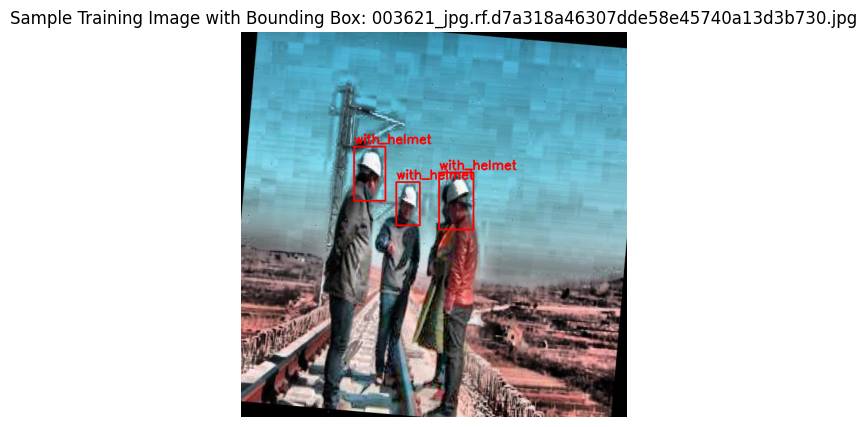

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

# base path (update as per your dataset location)
path = "/content/dataset"   # <-- apna dataset ka path yahan daalo

# pick a sample image and its label
img_dir = os.path.join(path, 'train/images')
lbl_dir = os.path.join(path, 'train/labels')

sample_img = os.listdir(img_dir)[0]   # first image
sample_lbl = os.path.splitext(sample_img)[0] + '.txt'   # matching label file

# read image
img = cv2.imread(os.path.join(img_dir, sample_img))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

# read label file
with open(os.path.join(lbl_dir, sample_lbl)) as f:
    lines = f.readlines()
    print(f'Corresponding YOLO label file : {sample_lbl}')

for line in lines:
    print(line.strip())

# define class names (edit as per your dataset)
# ⚠️ IMPORTANT: adjust mapping according to your dataset annotation
# If 0 = with helmet, 1 = without helmet → keep this order
# If opposite, swap the list
class_names = ['without_helmet', 'with_helmet']


# draw bounding box
for line in lines:
    cls, x_c, y_c, bw, bh = map(float, line.strip().split())
    cls = int(cls)

    # convert YOLO normalized coords -> pixel coords
    x_c, y_c, bw, bh = x_c * w, y_c * h, bw * w, bh * h
    x1, y1 = int(x_c - bw / 2), int(y_c - bh / 2)
    x2, y2 = int(x_c + bw / 2), int(y_c + bh / 2)

    # draw rectangle + label
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(img, class_names[cls], (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# show result
plt.figure(figsize=(7, 5))
plt.imshow(img)
plt.axis('off')
plt.title(f'Sample Training Image with Bounding Box: {sample_img}')
plt.show()


#Let's start



In [6]:
!pip install ultralytics --quiet



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.9 MB/s eta 0:00:00


In [7]:
import os, yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt

#verify dataset structure
!tree dataset -L 2

#load dataset yaml
DATA_YAML_PATH = '/content/dataset/data.yaml'

with open(DATA_YAML_PATH) as f:
  data_yaml = yaml.safe_load(f)

print("Classes:", data_yaml["names"])



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
/bin/bash: line 1: tree: command not found
Classes: ['head', 'helmet', 'person']


#Train the YOLOv8 Model

###KEY Parameters
 - epochs(50)
 - imgsz(640)
 - batch(16)
 - optimizer(AdamW)
 - lr0 (1e-3)
 - patience(15)
 - amp (True)
 - project/name -> where output are saved
 - save_period(5)

 ###Training ouput
 - last.pt -> final weights.
 - best.pt -> best performing weights on validation set.
 - results.csv -> metrics and loss logs.

In [9]:
#load model
model = YOLO('yolov8n.pt')

#train the model
results = model.train(
    data = DATA_YAML_PATH,
    epochs = 5,
    imgsz = 640,
    batch = 16,
    optimizer = 'AdamW',
    lr0 = 1e-3,
    patience = 15,
    amp = True,
    project = '/content/helmet_yolov8s_runs',
    name = 'exp',
    exist_ok = True,
    save_period = 5
)

print("Training finished")

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=0.0, plots=True, pose=12.0, 

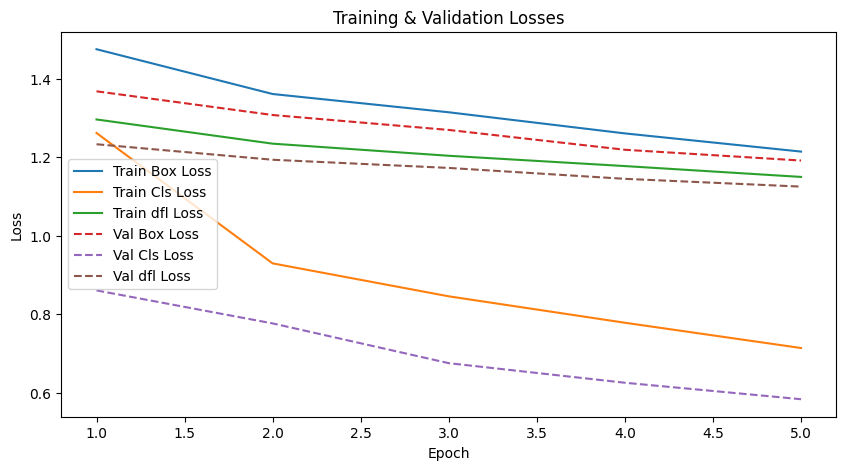

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

#load training results
results = pd.read_csv('/content/helmet_yolov8s_runs/exp/results.csv')

plt.figure(figsize=(10,5))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Cls Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train dfl Loss')

plt.plot(results['epoch'], results['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(results['epoch'], results['val/cls_loss'], label='Val Cls Loss', linestyle='--')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Val dfl Loss', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.title("Training & Validation Losses")
plt.legend()
plt.show()





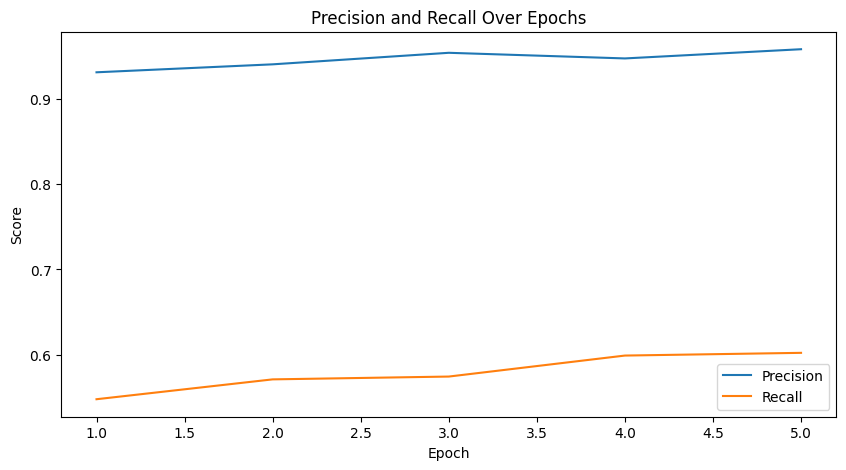

In [19]:
#Plot mAP Scores
plt.figure(figsize=(10,5))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Precision and Recall Over Epochs")
plt.legend()
plt.show()

In [21]:
#load the best model weights
best_model = YOLO('/content/helmet_yolov8s_runs/exp/weights/best.pt')

#Run inference on test images
test_dir = '/content/dataset/test/images'

results = best_model.predict(source=test_dir, conf=0.25, save=True)

print("Inference complete. Check predictions in runs/detect/exp/")


image 1/703 /content/dataset/test/images/000008_jpg.rf.48ab839ebdac5e818db7202d5e7e2cc2.jpg: 640x640 1 head, 7 helmets, 20.1ms
image 2/703 /content/dataset/test/images/000009_jpg.rf.a44387a9e2ffce94c2e4f002f85f134d.jpg: 640x640 1 helmet, 15.7ms
image 3/703 /content/dataset/test/images/000011_jpg.rf.3df95d9c7b5fb9912b2cea5a2b1bbc85.jpg: 640x640 18 helmets, 24.4ms
image 4/703 /content/dataset/test/images/000020_jpg.rf.59cf0b1a03d859055cd654b11a545546.jpg: 640x640 1 helmet, 20.9ms
image 5/703 /content/dataset/test/images/000036_jpg.rf.d663dc1115b5f721b9fac7afd5242801.jpg: 640x640 1 helmet, 17.2ms
image 6/703 /content/dataset/test/images/000045_jpg.rf.47d687a36648cb80f9d3c1797ee988e0.jpg: 640x640 1 helmet, 19.4ms
image 7/703 /content/dataset/test/images/000060_jpg.rf.f115475175fa41c0b9f95b9086304d54.jpg: 640x640 1 helmet, 12.9ms
image 8/703 /content/dataset/test/images/000062_jpg.rf.b399311bce2029e354c56b83af521927.jpg: 640x640 1 helmet, 17.5ms
image 9/703 /content/dataset/test/images/000

#Visulalize Prediction


image 1/1 /content/dataset/test/images/005979_jpg.rf.f1271441b9d23b3635a750e982329dba.jpg: 640x640 1 head, 3 helmets, 7.4ms
Speed: 2.6ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


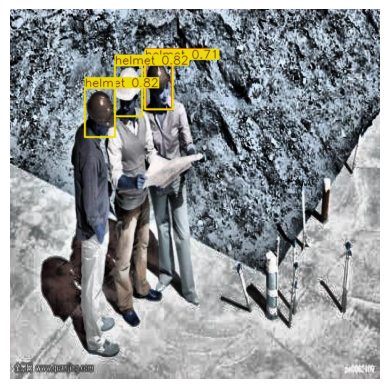

In [23]:
import random

#pick a random test image
sample_img = os.path.join(test_dir, random.choice(os.listdir(test_dir)))

#run inference
pred = best_model.predict(sample_img, conf=0.25, save=False)

#Display output
for r in pred:
  im_array = r.plot()
  plt.imshow(im_array)
  plt.axis('off')
  plt.show()

#Mount Google Drvie